# 불균형 분류에 대한 Random Oversampling 및 Undersampling 

## Random Undersampling 

- Random Undersampling은 다수 클래스에서 example 을 삭제하므로 모델에 중요한 정보를 잃을 수 있습니다.


## Random Oversampling

- Random Oversampling은 훈련 데이터 세트의 소수 클래스의 예제를 복제하므로 일부 모델에 대해 과적합을 초래할 수 있습니다.  

- Training set 에서 복원 추출    

## Imbalanced-Learn Library

In [1]:
# scikit-lean version 1.4.0 이상에서는 imblean library import 문제 발생하므로 version downgrade
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn

In [2]:
import sklearn
sklearn.__version__

'1.2.2'

In [3]:
from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

make_classification : 랜덤 n-class 분류 문제 생성  

- weights :  각 클래스에 할당된 샘플의 비율. None - 균형 class
- flip_y :  클래스가 무작위로 할당된 샘플의 비율. 값이 클수록 레이블에 노이즈가 발생하고 분류 작업이 더 어려워진다.

### 임의의 n-class 분류 문제를 생성
- normal(0) : abnormal(1) = 99:1 의 비율로 data 생성

In [4]:
# 분류 문제를 위한 합성 데이터 세트 생성
# n_samples=10000: 샘플의 총 수 10,000개
# n_features=10: 특성(독립 변수)의 수 10개
# n_classes=2: 클래스(종속 변수)의 수 2개, 이진 분류 문제를 의미
# weights=(0.99,): 첫 번째 클래스의 샘플이 전체의 99%를 차지하도록 설정
# flip_y=0.0: 샘플의 레이블을 무작위로 뒤집을 확률, 여기서는 0%로 설정
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_classes=2, weights=(0.99,), flip_y=0.0, random_state=0)

print(X.shape, y.shape) # 생성된 데이터 세트의 차원
print(Counter(y)) # 클래스 분포

(10000, 10) (10000,)
Counter({0: 9900, 1: 100})


<Axes: ylabel='count'>

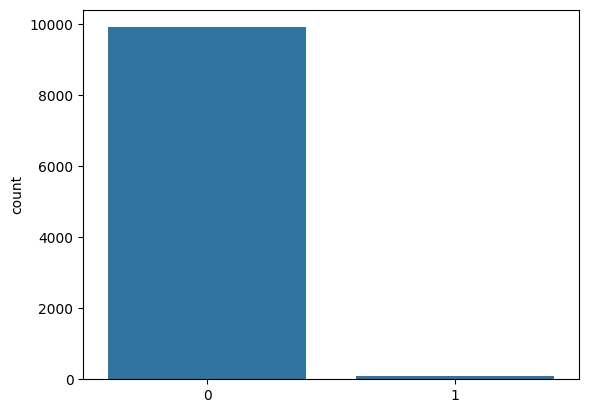

In [5]:
sns.countplot(x=y)

### Over Sampling

sampling_strategy  : 리샘플링 후 다수 클래스 샘플 수에 대한 소수 클래스 샘플 수의 원하는 비율  

- minority class 를 oversampling 하여 normal(0) : abnormal(1) = 2:1 이 되도록 resample

In [6]:
# 오버샘플링 전략을 설정합니다. 여기서는 적은 클래스의 샘플 수를 전체의 50%로 맞추는 전략을 사용합니다.
oversample = RandomOverSampler(sampling_strategy=0.5)

# X와 y 데이터를 오버샘플링하여 새로운 X_over와 y_over 데이터를 생성합니다.
X_over, y_over = oversample.fit_resample(X, y)

print(X_over.shape, y_over.shape)

# 오버샘플링된 y 데이터의 클래스 분포 출력
print(Counter(y_over))

(14850, 10) (14850,)
Counter({0: 9900, 1: 4950})


<Axes: ylabel='count'>

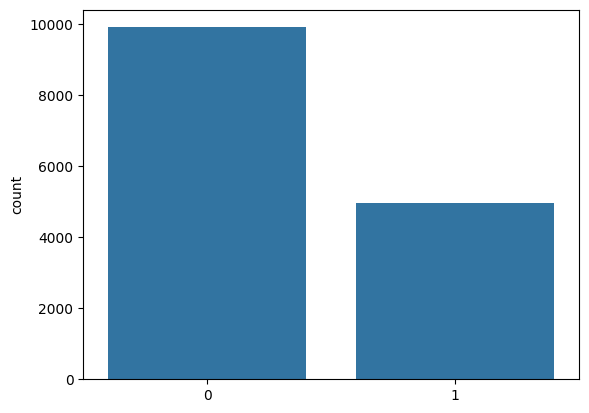

In [7]:
# y_over 데이터의 클래스 분포를 시각화합니다.
# sns.countplot() 함수는 각 클래스의 샘플 수를 세어 막대 그래프로 보여줍니다.
sns.countplot(x=y_over)

### Under Sampling

sampling_strategy : `majority`: 다수 클래스만 리샘플링 

- majority class 를 undersample 하여 normal(0) : abnormal(1) = 1:1 이 되도록 resample

In [8]:
# 'majority': 다수 클래스의 샘플 수를 소수 클래스의 샘플 수와 동일하게 줄입니다. 
undersample = RandomUnderSampler(sampling_strategy='majority') 

X_under, y_under = undersample.fit_resample(X, y)
X_under.shape, y_under.shape, Counter(y_under)

((200, 10), (200,), Counter({0: 100, 1: 100}))

<Axes: ylabel='count'>

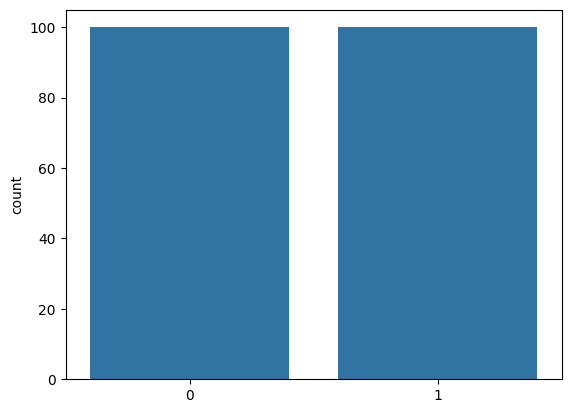

In [9]:
# y_under 데이터의 클래스 분포를 시각화합니다.
# sns.countplot() 함수는 각 클래스의 샘플 수를 세어 막대 그래프로 보여줍니다.
sns.countplot(x=y_under)

## Random Oversampling 과 Undersampling을 동시 적용
- 소수 class 를 oversampling 하여 normal(0) : abnormal(1) = 10:1 이 되도록 하고,  
- 다수 class 를 undersampling 하여 normal(0) : abnormal(1) = 2:1 이 되도록 한다.

In [10]:
# sampling_strategy=0.1은 소수 클래스를 다수 클래스의 10%까지 증가시킴
oversample = RandomOverSampler(sampling_strategy=0.1)

X, y = oversample.fit_resample(X, y)
print(X.shape, y.shape, Counter(y))
print()

# sampling_strategy=0.5는 다수 클래스를 소수 클래스의 2배까지 감소시킴
undersample = RandomUnderSampler(sampling_strategy=0.5)

X, y = undersample.fit_resample(X, y)
print(X.shape, y.shape, Counter(y))

(10890, 10) (10890,) Counter({0: 9900, 1: 990})

(2970, 10) (2970,) Counter({0: 1980, 1: 990})


<Axes: ylabel='count'>

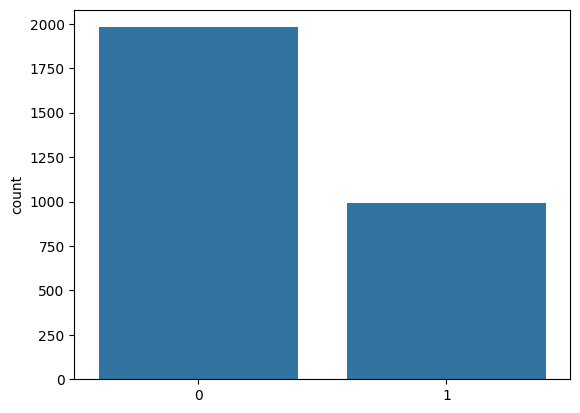

In [11]:
sns.countplot(x=y)

### 임의의 n-class 분류 문제를 생성
- normal(0) : abnormal(1) = 99:1 의 비율로 data 생성

In [12]:
# make_classification 함수를 사용하여 분류용 샘플 데이터를 만듭니다.
# n_samples: 총 샘플 수 (여기서는 10000개)
# n_features: 각 샘플의 특성 수 (여기서는 10개)
# n_classes: 클래스의 수 (여기서는 2개)
# weights: 클래스의 비율 (여기서는 첫 번째 클래스가 99%, 두 번째 클래스가 1%)
# flip_y: 샘플의 클래스 레이블을 무작위로 변경할 비율 (여기서는 0%)
# random_state: 난수 시드 (재현성을 위해 0으로 설정)
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_classes=2, weights=(0.99,), flip_y=0.0, random_state=0)
print(X.shape, y.shape)
# y 데이터의 클래스 분포를 출력합니다.
print(Counter(y))

(10000, 10) (10000,)
Counter({0: 9900, 1: 100})


## SMOTE (Synthetic Minority Over-Sampling Technique) 적용

http://www.incodom.kr/SMOTE

- SMOTE는 불균형 데이터셋에서 소수 클래스의 샘플을 늘려 데이터의 균형을 맞추기 위한 오버샘플링 기법입니다.  
- 소수 클래스의 각 샘플에 대해 k-최근접 이웃(k-nearest neighbors)을 찾습니다. 기본적으로 k는 5로 설정됩니다.  
- 각 소수 클래스 샘플에 대해 선택된 k-최근접 이웃 중 하나를 무작위로 선택합니다.  
- 선택된 이웃과 원래 샘플 사이의 선형 간격을 따라 새로운 샘플을 생성합니다. 새로운 샘플은 원래 샘플과 이웃 샘플 사이의 선형 보간(interpolation)으로 생성됩니다.  

In [13]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체를 생성합니다. sampling_strategy를 생략하면 소수 클래스가 다수 클래스와 같아질 때까지 오버샘플링합니다.
smote = SMOTE(random_state=0)

# SMOTE를 사용하여 데이터셋을 재샘플링합니다.
X_over, y_over = smote.fit_resample(X, y)

print(X_over.shape, y_over.shape)

print('SMOTE 적용 전 레이블 비율: ', X.shape, y.shape, Counter(y))
print('SMOTE 적용 후 레이블 비율: ', X_over.shape, y_over.shape, Counter(y_over))

(19800, 10) (19800,)
SMOTE 적용 전 레이블 비율:  (10000, 10) (10000,) Counter({0: 9900, 1: 100})
SMOTE 적용 후 레이블 비율:  (19800, 10) (19800,) Counter({0: 9900, 1: 9900})


<Axes: ylabel='count'>

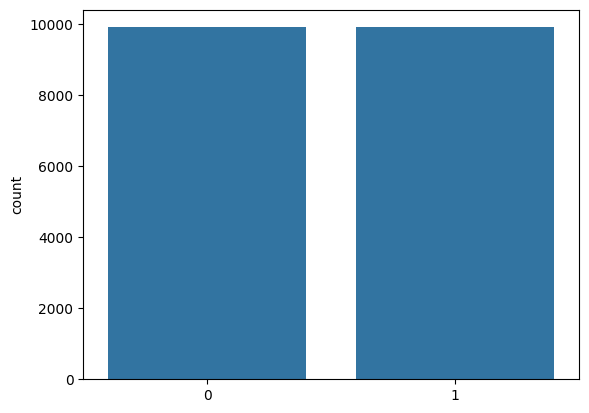

In [14]:
sns.countplot(x=y_over)

- SMOTE 적용 전, 후 분포 시각화  

- 시각화를 위해 2 차원으로 축소

SMOTE 적용전 original data 시각화

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)    # 2 개 component 로 차원 축소

X_pca = pca.fit_transform(X)
X_pca.shape, Counter(y)

((10000, 2), Counter({0: 9900, 1: 100}))

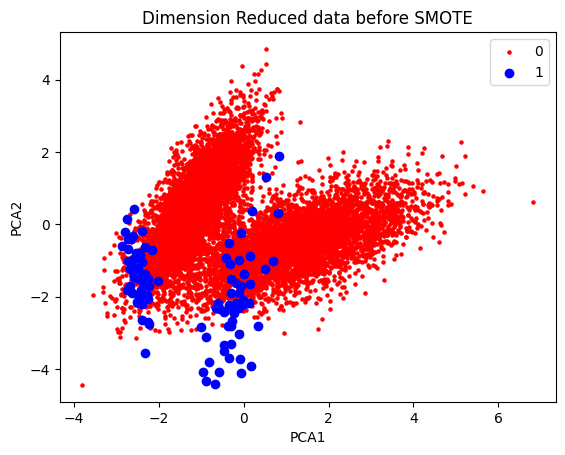

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'b'])

X1, X2 = X_pca[y == 0, 0], X_pca[y == 0, 1]
plt.scatter(X1, X2, color=cmap(0), label=0, s=5)

X1, X2 = X_pca[y == 1, 0], X_pca[y == 1, 1]
plt.scatter(X1, X2, color=cmap(1), label=1)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Dimension Reduced data before SMOTE');

SMOTE 적용 후 data 시각화

In [17]:
pca = PCA(n_components=2, random_state=0)                # 2 개 component 로 차원 축소

X_pca = pca.fit_transform(X_over)
X_pca.shape, Counter(y_over)

((19800, 2), Counter({0: 9900, 1: 9900}))

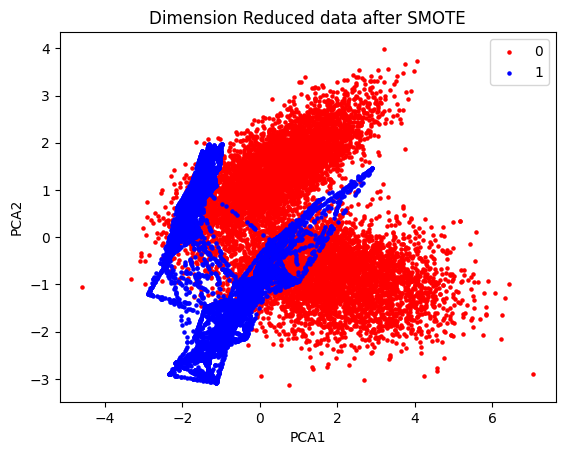

In [18]:
X1, X2 = X_pca[y_over == 0, 0], X_pca[y_over == 0, 1]
plt.scatter(X1, X2, color=cmap(0), label=0, s=5)

X1, X2 = X_pca[y_over == 1, 0], X_pca[y_over == 1, 1]
plt.scatter(X1, X2, color=cmap(1), label=1, s=5)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Dimension Reduced data after SMOTE');